# 1. Library

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# matplotlib 한글 표시 지원
plt.rcParams['font.family'] = 'NanumGothic'

# 2. Skimming Data

In [160]:
bus_data = pd.read_csv("bus_feature.csv")
subway_data = pd.read_csv("subway_feature.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

/tmp/ipykernel_52474/2401849155.py:3: DtypeWarning:

Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.



In [161]:
print(f"bus data shape : {bus_data.shape}")
print(f"subway data shape : {subway_data.shape}")
print(f"train data shape : {train_data.shape}")

bus data shape : (12584, 6)
subway data shape : (768, 5)
train data shape : (1118822, 52)


In [162]:
bus_data.head(3)

,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로


In [163]:
subway_data.head(3)

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868


In [164]:
pd.set_option('display.max_columns', None)

train_data.head(3)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500


- Analytics

    - object 특성을 찾아보니 몇개는 양쪽 공백이 있는 경우가 존재 → 제거

    - k-전화번호, k-팩스번호 삭제 → 아파트 값에 전화번호 및 팩스번호는 불필요하다 생각됨

        - 또한, 주소만으로도 각 데이터를 구분할 수 있기에 중복된 값이라 판단하고 제거해도 무방

        - 값 확인 결과 '0222222222'처럼 object 특성도 있는 반면 222222222처럼 int 특성도 존재

            - 해당 부분은 상관 X → 같은 전화번호를 str, int 로 표기했느냐의 차이
    
    - 위와 같이 아파트 값에 영향을 미치지 않는다고 판단하는 특성 삭제

        - k-홈페이지, 고용보험관리번호, k-등록일자, k-수정일자. 관리비 업로드, 단지소개기존clob

    - 번지 → 본번, 부번이므로 본번, 부번 특성 삭제 및 시군구 특성 삭제

        - 위치 특성을 나타내는 값이 중복적으로 너무 많음

    - 계약년월을 계약(연), 계약(월)로 분해
        
        - 년도에 따른 시세 변화, 월에 따른 계절 변화 예상

    - 단지신청일, 단지승인일, 

In [165]:
# 문자열 컬럼만 찾아서 좌우 공백 제거
train_data = train_data.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# 전화번호, 팩스번호 k-홈페이지, 고용보험관리번호, k-등록일자, k-수정일자, 관리비 업로드, 단지소개기존clob 삭제
train_data = train_data.drop(columns=['k-전화번호', 'k-팩스번호', 'k-홈페이지', '고용보험관리번호', 'k-등록일자', 'k-수정일자', '관리비 업로드', '단지소개기존clob'])

# 본번, 부번, 시군구 삭제
train_data = train_data.drop(columns=['본번', '부번', '시군구'])

# 계약년월 분해
train_data['계약(연)'] = train_data['계약년월'] // 100
train_data['계약(월)'] = train_data['계약년월'] % 100
train_data = train_data.drop(columns=['계약년월'])

# 계약일 → 계약(일)
train_data = train_data.rename(columns={"계약일" : "계약(일)"})

In [122]:
missing_percent = train_data.isnull().mean()

columns_to_drop = missing_percent[missing_percent >= 0.5].index

columns_to_drop

Index(['해제사유발생일', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [123]:
keep_cols = [
    '주차대수', '좌표X', '좌표Y', 'k-세대타입(분양형태)',
    '해제사유발생일', '사용허가여부', '등기신청일자', 'k-단지분류(아파트,주상복합등등)'
]

set_columns = list(set(train_data.columns) - set(columns_to_drop)) + keep_cols

train_data = train_data[set_columns]

In [127]:
train_data.head(1)

,층,도로명,아파트명,등기신청일자,계약(월),건축년도,중개사소재지,전용면적(㎡),계약(연),계약(일),거래유형,target,번지,주차대수,좌표X,좌표Y,k-세대타입(분양형태),해제사유발생일,사용허가여부,등기신청일자,"k-단지분류(아파트,주상복합등등)"
0,3,언주로 3,개포6차우성,,12,1987,-,79.97,2017,8,-,124000,658-1,262.0,127.05721,37.476763,분양,NaN,Y,,아파트


# 3. Analytics & Visualizaion

## 3.1 Train Data

In [166]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 42 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   번지                      1118597 non-null  object 
 1   아파트명                    1116696 non-null  object 
 2   전용면적(㎡)                 1118822 non-null  float64
 3   계약(일)                   1118822 non-null  int64  
 4   층                       1118822 non-null  int64  
 5   건축년도                    1118822 non-null  int64  
 6   도로명                     1118822 non-null  object 
 7   해제사유발생일                 5983 non-null     float64
 8   등기신청일자                  1118822 non-null  object 
 9   거래유형                    1118822 non-null  object 
 10  중개사소재지                  1118822 non-null  object 
 11  k-단지분류(아파트,주상복합등등)      248131 non-null   object 
 12  k-세대타입(분양형태)            249259 non-null   object 
 13  k-관리방식                  249259 non-null   object 
 14  k-

In [167]:
train_data.isnull().sum()

번지                            225
아파트명                         2126
전용면적(㎡)                         0
계약(일)                           0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1112839
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         870691
k-세대타입(분양형태)               869563
k-관리방식                     869563
k-복도유형                     869890
k-난방방식                     869563
k-전체동수                     870630
k-전체세대수                    869563
k-건설사(시공사)                 871058
k-시행사                      871254
k-사용검사일-사용승인일              869696
k-연면적                      869563
k-주거전용면적                   869608
k-관리비부과면적                  869563
k-전용면적별세대현황(60㎡이하)         869608
k-전용면적별세대현황(60㎡~85㎡이하)     869608
k-85㎡~135㎡이하               869608
k-135㎡초과                  1118495
경비비관리형태                    870988
세대전기계약방법      

In [168]:
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"수치형 변수 : {numeric_columns}, Count : {len(numeric_columns)}")
print(f"범주형 변수 : {categorical_columns}, Count : {len(categorical_columns)}")

수치형 변수 : ['전용면적(㎡)', '계약(일)', '층', '건축년도', '해제사유발생일', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', '계약(연)', '계약(월)'], Count : 21
범주형 변수 : ['번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '단지신청일'], Count : 21


- Analytics

    - 훈련 데이터는 target을 포함한 23개의 수치형 데이터, 29개의 범주형 데이터로 구성

    - 언뜻 보기만 해도 대부분의 특성이 결측치를 매우 많이 가지고 있는 것을 알 수 있음

### 3.1.1 수치형 데이터

In [111]:
pd.set_option('display.float_format', '{:.6f}'.format)

train_data.describe()

,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,k-전체세대수,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target
count,1118747.000000,1118747.000000,1118822.000000,1118822.000000,1118822.000000,1118822.000000,1118822.000000,5983.000000,68582.000000,248192.000000,249259.000000,249259.000000,249214.000000,249259.000000,249214.000000,249214.000000,249214.000000,327.000000,249108.000000,249108.000000,249152.000000,249152.000000,1118822.000000
mean,564.910822,5.978885,77.174747,201476.036448,15.806557,8.871968,1998.755327,20210570.125857,541.529979,14.798346,1184.124593,161496.670539,94210.104998,120726.487549,477.912838,476.713439,167.528470,70.000000,189507.007895,1063.678778,126.995228,37.545785,57991.532149
std,516.064204,46.685836,29.364231,418.786766,8.721166,5.982584,9.333908,10606.968630,751.809853,17.693533,1191.474680,183985.604847,101905.956897,129020.276480,759.909400,727.553569,248.928143,0.000000,1729026.819390,1235.437604,0.091045,0.052483,46426.021936
min,0.000000,0.000000,10.020000,200701.000000,1.000000,-4.000000,1961.000000,20200221.000000,1.000000,1.000000,59.000000,0.000000,2338.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,126.798318,37.447843,350.000000
25%,176.000000,0.000000,59.650000,201110.000000,8.000000,4.000000,1992.000000,20200820.000000,4.000000,5.000000,403.000000,53666.000000,31934.000000,40735.000000,48.000000,95.000000,0.000000,70.000000,0.000000,315.000000,126.913157,37.499201,30500.000000
50%,470.000000,0.000000,81.880000,201507.000000,16.000000,8.000000,2000.000000,20210304.000000,174.000000,10.000000,768.000000,101633.000000,60280.000000,78125.000000,225.000000,256.000000,63.000000,70.000000,1710.550000,683.000000,127.014971,37.544936,44800.000000
75%,781.000000,1.000000,84.960000,201804.000000,23.000000,12.000000,2005.000000,20220211.000000,725.000000,17.000000,1622.000000,203904.000000,117086.000000,159544.000000,576.000000,582.000000,237.000000,70.000000,8414.210000,1274.000000,127.059590,37.577117,69800.000000
max,4974.000000,2837.000000,424.320000,202306.000000,31.000000,69.000000,2023.000000,20230926.000000,2888.000000,124.000000,9510.000000,9591851.000000,734781.000000,969877.000000,4975.000000,5132.000000,1500.000000,70.000000,31596200.000000,12096.000000,127.179998,37.687725,1450000.000000


In [112]:
pd.reset_option('display.float_format')

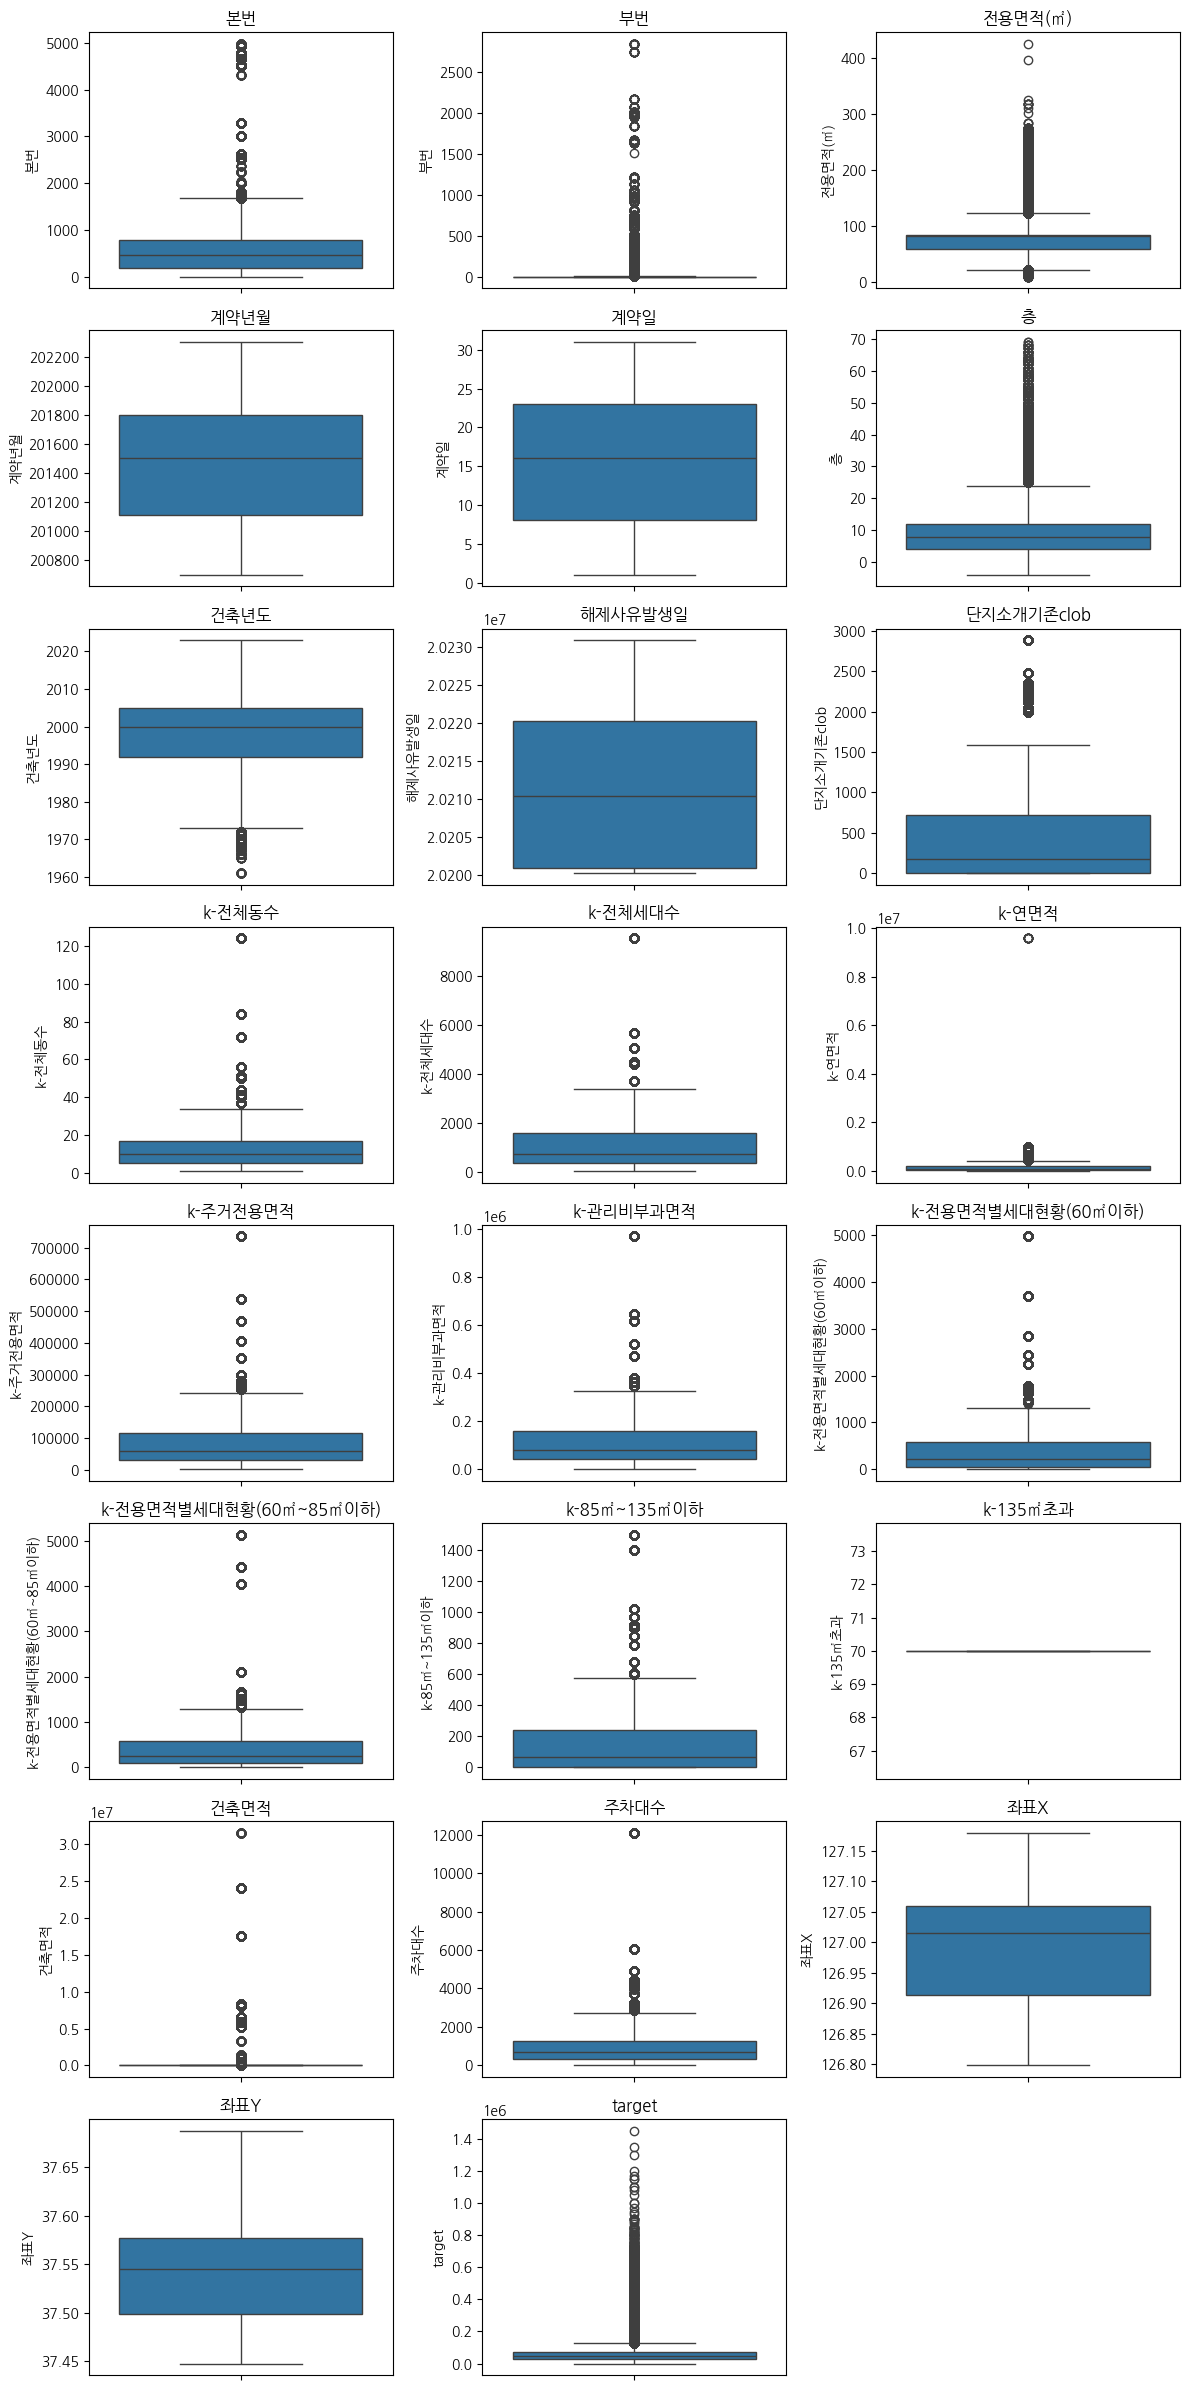

In [113]:
cols = 3
rows = math.ceil(len(numeric_columns) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))

axes = axes.flatten()

for i, col in enumerate(numeric_columns) :
    sns.boxplot(y=train_data[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Analytics

    - 본번, 부번, 전용면적, 층, 연면적, 건축면적, 주거전용면적 등등 target을 포함하여 대부분의 특성이 하위 구간에 편중

        - 이는 Log 처리가 필요함을 시사

    - 또한, 상위에 극단적인 이상치가 존재 → 이상치를 처리해줄 기준 필요

    - 계약년월, 계약일, 해제사유발생일의 경우 이상치 없이 고르게 분포

    - 건축년도의 경우 이상치가 존재하나 건축년도와 아파트의 가격사이 관계가 있다고 판단하여 이상치 처리 X

    - 좌표의 경우 클러스터링 기법을 통해 군집분석 or 지도 시각화 → 클러스터 라벨 생성

    - 더 자세하게는 각각 특성과 target의 관계에서 파악 예정

## 3.2 Test Data

In [114]:
test_data.head(3)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,언주로 3,NaN,,직거래,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,개포로 311,NaN,,중개거래,서울 강남구,아파트,025763999,025763998,NaN,분양,위탁관리,계단식,지역난방,2.0,232.0,포스코,개포우성9차모델링조합,2021-12-01 00:00:00.0,44951.0,24878.0,31174.0,0.0,0.0,232.0,NaN,thesharp-trieh.hthomeservice.com/#/feeManage?_...,2022-01-05 18:02:23.0,2023-09-23 17:23:08.0,NaN,위탁,종합계약,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,개포로 307,NaN,,중개거래,서울 강남구,아파트,025749116,025749094,2888.0,분양,자치관리,혼합식,지역난방,5.0,405.0,우성건설,우성건설,1984-12-31 00:00:00.0,63304.0,53437.0,61064.0,0.0,0.0,285.0,NaN,NaN,NaN,2023-09-23 17:15:43.0,21380015910,직영,단일계약,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0


In [115]:
test_data.shape

(9272, 51)

In [116]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   시군구                     9272 non-null   object 
 1   번지                      9270 non-null   object 
 2   본번                      9272 non-null   float64
 3   부번                      9272 non-null   float64
 4   아파트명                    9262 non-null   object 
 5   전용면적(㎡)                 9272 non-null   float64
 6   계약년월                    9272 non-null   int64  
 7   계약일                     9272 non-null   int64  
 8   층                       9272 non-null   int64  
 9   건축년도                    9272 non-null   int64  
 10  도로명                     9272 non-null   object 
 11  해제사유발생일                 212 non-null    float64
 12  등기신청일자                  9272 non-null   object 
 13  거래유형                    9272 non-null   object 
 14  중개사소재지                  9272 non-null   

In [117]:
test_data.isnull().sum()

시군구                          0
번지                           2
본번                           0
부번                           0
아파트명                        10
전용면적(㎡)                      0
계약년월                         0
계약일                          0
층                            0
건축년도                         0
도로명                          0
해제사유발생일                   9060
등기신청일자                       0
거래유형                         0
중개사소재지                       0
k-단지분류(아파트,주상복합등등)        6582
k-전화번호                    6576
k-팩스번호                    6606
단지소개기존clob                8718
k-세대타입(분양형태)              6562
k-관리방식                    6562
k-복도유형                    6564
k-난방방식                    6562
k-전체동수                    6577
k-전체세대수                   6562
k-건설사(시공사)                6579
k-시행사                     6580
k-사용검사일-사용승인일             6563
k-연면적                     6562
k-주거전용면적                  6562
k-관리비부과면적                 6562
k-전용면적별세대현황(60㎡이하)        6562
k-전용면적별세

훈련 데이터셋의 결측치 비율과 테스트 데이터셋의 결측치 비율 확인이 필요하다고 생각됨.

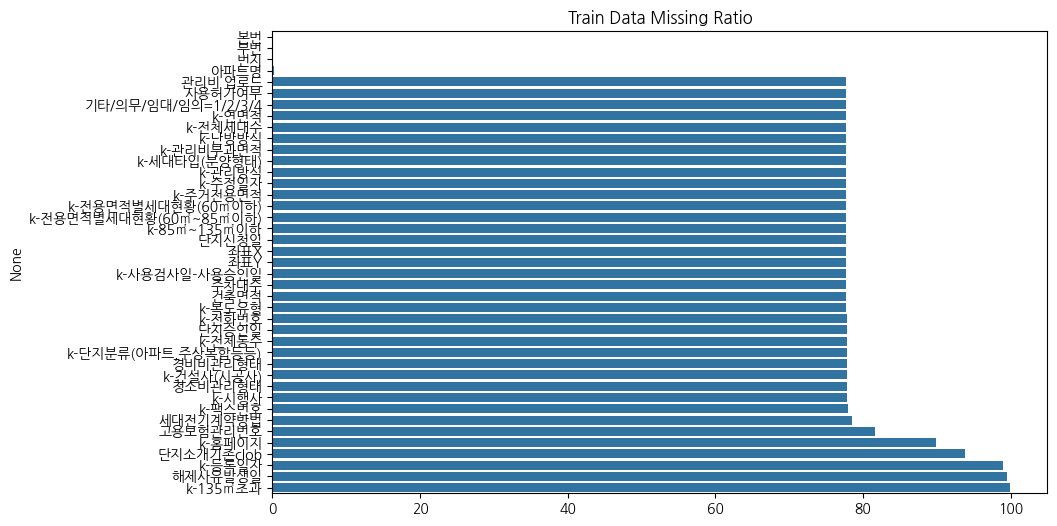

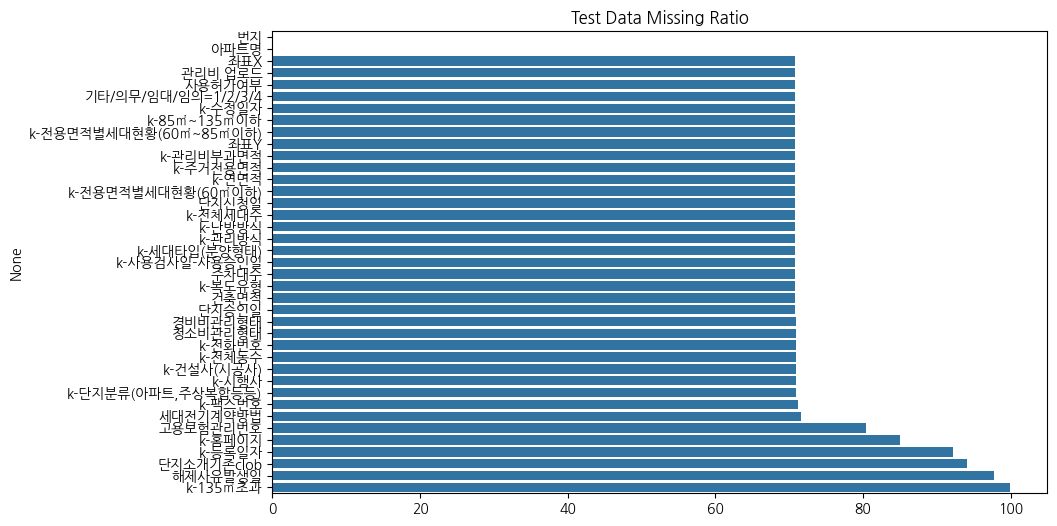

In [118]:
train_missing_ratio = train_data.isnull().mean() * 100
test_missing_ratio = test_data.isnull().mean() * 100

train_missing_ratio = train_missing_ratio[train_missing_ratio > 0].sort_values(ascending=True)

test_missing_ratio = test_missing_ratio[test_missing_ratio > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=train_missing_ratio.values, y=train_missing_ratio.index)
plt.title("Train Data Missing Ratio")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=test_missing_ratio.values, y=test_missing_ratio.index)
plt.title("Test Data Missing Ratio")
plt.show()

- Analytics

    - 훈련 데이터셋과 테스트 데이터셋에서 결측치의 비율이 거의 동일하다는 것을 볼 수 있음.

        - 전처리 방식을 일관되게 적용 가능

In [119]:
for i in range(len(categorical_columns)):
    print(f'{categorical_columns[i]} : {len(train_data[categorical_columns[i]].unique())}개')
    print(f'{categorical_columns[i]} : {len(test_data[categorical_columns[i]].unique())}개')

시군구 : 339개
시군구 : 270개
번지 : 6573개
번지 : 1892개
아파트명 : 6539개
아파트명 : 2171개
도로명 : 9232개
도로명 : 2642개
등기신청일자 : 182개
등기신청일자 : 60개
거래유형 : 3개
거래유형 : 2개
중개사소재지 : 643개
중개사소재지 : 357개
k-단지분류(아파트,주상복합등등) : 6개
k-단지분류(아파트,주상복합등등) : 5개
k-전화번호 : 1082개
k-전화번호 : 570개
k-팩스번호 : 1365개
k-팩스번호 : 564개
k-세대타입(분양형태) : 4개
k-세대타입(분양형태) : 4개
k-관리방식 : 4개
k-관리방식 : 4개
k-복도유형 : 6개
k-복도유형 : 6개
k-난방방식 : 5개
k-난방방식 : 5개
k-건설사(시공사) : 345개
k-건설사(시공사) : 269개
k-시행사 : 556개
k-시행사 : 441개
k-사용검사일-사용승인일 : 674개
k-사용검사일-사용승인일 : 534개
k-홈페이지 : 222개
k-홈페이지 : 193개
k-등록일자 : 127개
k-등록일자 : 98개
k-수정일자 : 744개
k-수정일자 : 572개
고용보험관리번호 : 527개
고용보험관리번호 : 404개
경비비관리형태 : 5개
경비비관리형태 : 5개
세대전기계약방법 : 3개
세대전기계약방법 : 3개
청소비관리형태 : 5개
청소비관리형태 : 5개
기타/의무/임대/임의=1/2/3/4 : 5개
기타/의무/임대/임의=1/2/3/4 : 5개
단지승인일 : 736개
단지승인일 : 568개
사용허가여부 : 2개
사용허가여부 : 2개
관리비 업로드 : 3개
관리비 업로드 : 3개
단지신청일 : 260개
단지신청일 : 210개


- Analytics

    - 훈련 데이터셋과 테스트 데이터셋의 범주형 변수의 범주 수가 일치하지 않는 경우가 많음

        - 전처리 과정에서 새로운 범주로 나누어 간소화시킬 필요가 있음

수치형 특성에서 본번, 부번

# EDA

## 4.1 수치형 데이터

### 4.1.1 Target

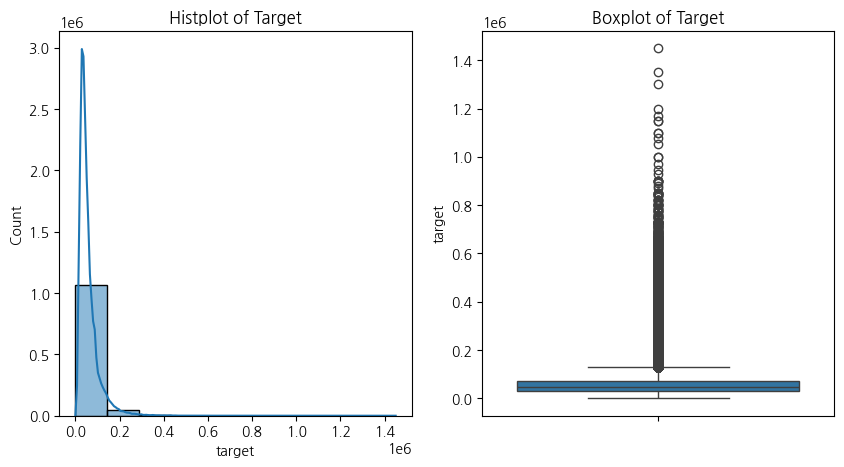

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(x='target', data=train_data, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of Target')

sns.boxplot(y='target', data=train_data, ax=ax[1])
ax[1].set_title('Boxplot of Target')
plt.show()

- Analytics

    - target은 왼쪽으로 치우쳐져 있기에 Log 변환을 적용하여 훈련하는 것이 필요

### 4.1.2 전용면적(m^2)

In [150]:
train_data['전용면적(㎡)'].isnull().sum()

0

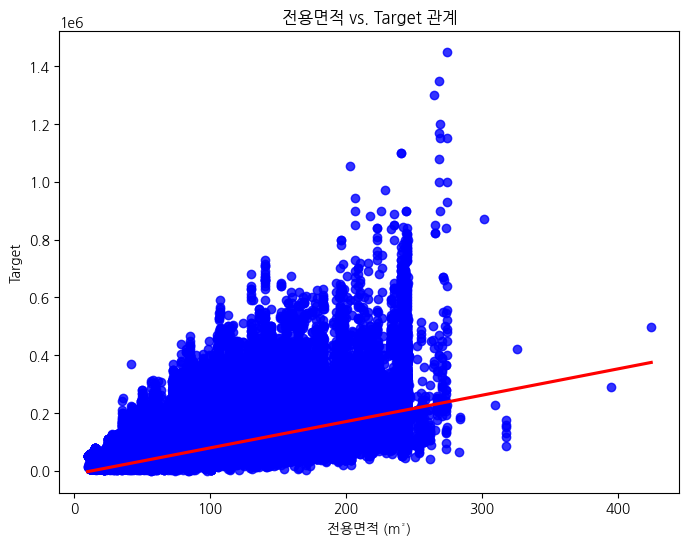

In [170]:
plt.figure(figsize=(8, 6))
sns.regplot(x='전용면적(㎡)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('전용면적 vs. Target 관계')
plt.xlabel('전용면적 (m²)')
plt.ylabel('Target')
plt.show()


- Analytics

    - 300($m^2$) 선을 넘는 값을 이상치라 생각했을 때 선형적 관계 → Keep

### 4.1.3 계약(일)

In [171]:
train_data['계약(일)'].isnull().sum()

0

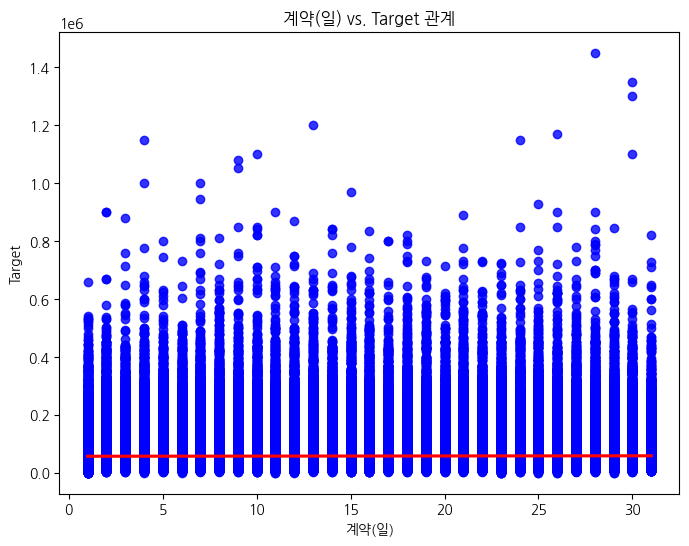

In [172]:
plt.figure(figsize=(8, 6))
sns.regplot(x='계약(일)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('계약(일) vs. Target 관계')
plt.xlabel('계약(일)')
plt.ylabel('Target')
plt.show()


- Analytics

    - 선형 회귀선이 x축과 평행하므로 계약(일) Drop

### 4.1.4 층

In [173]:
train_data['층'].isnull().sum()

0

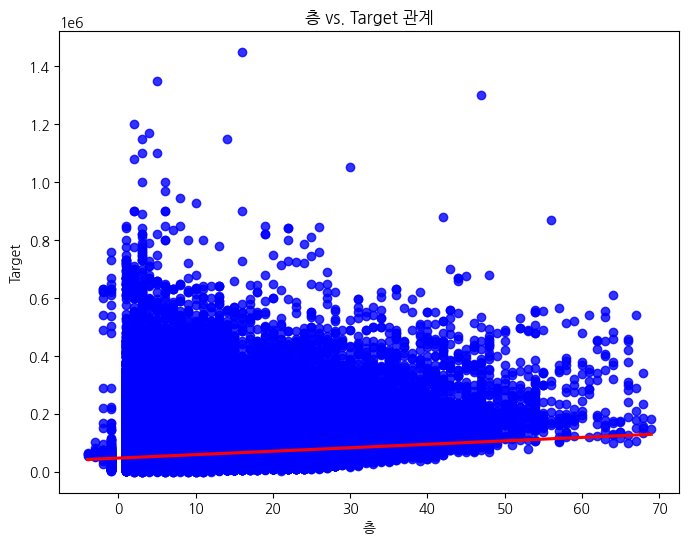

In [174]:
plt.figure(figsize=(8, 6))
sns.regplot(x='층', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('층 vs. Target 관계')
plt.xlabel('층')
plt.ylabel('Target')
plt.show()


- Analytics

    - 층이 낮을수록 넓게 분포, 층이 높을수록 좁게 분포 → 모델 훈련 시 모델이 헷갈릴 위험성 존재 → Drop

### 4.1.5 건축년도

In [175]:
train_data['건축년도'].isnull().sum()

0

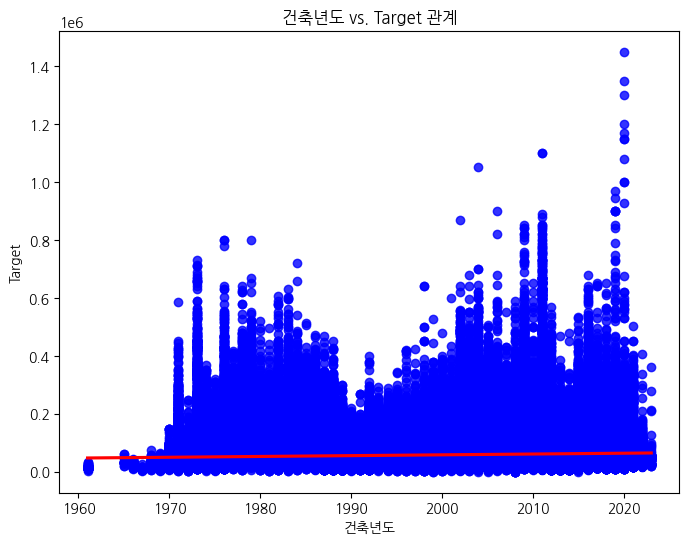

In [176]:
plt.figure(figsize=(8, 6))
sns.regplot(x='건축년도', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('건축년도 vs. Target 관계')
plt.xlabel('건축년도')
plt.ylabel('Target')
plt.show()


- Analytics

    - 1960 ~ 1980 증가 / 1990년대 감소 / 이후 증가추세 (2010년대 감소)
    
    - 비선형적 관계가 뚜렷 → Keep

### 4.1.6 해제사유발생일

In [177]:
train_data['해제사유발생일'].isnull().sum()

1112839

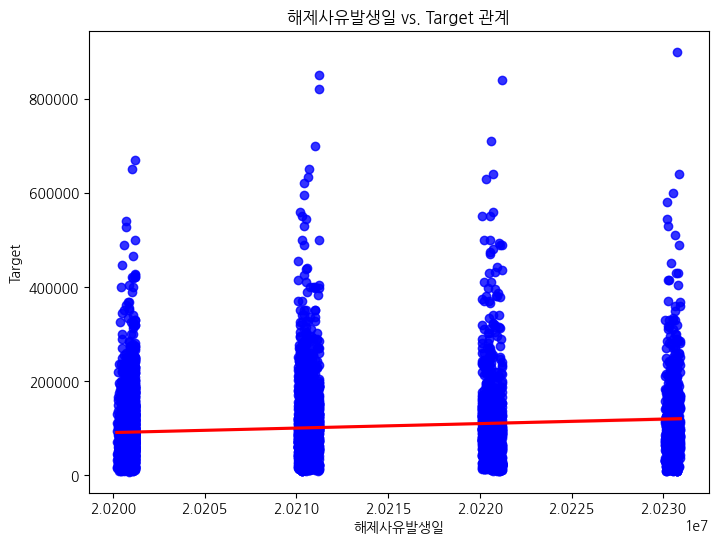

In [178]:
plt.figure(figsize=(8, 6))
sns.regplot(x='해제사유발생일', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('해제사유발생일 vs. Target 관계')
plt.xlabel('해제사유발생일')
plt.ylabel('Target')
plt.show()


- Analytics

    - 해당 특성은 발생일보다는 발생했느냐 안했느냐로 판단하는 것이 좋아보임 → 파생변수 생성

    - 결측치가 매우 많지만 이는 2020년대 이후로 수집된 데이터라 그럴것이라 판단

    - 이후 추가적인 판단 필요

### 4.1.7 k-전체동수

In [179]:
train_data['k-전체동수'].isnull().sum()

870630

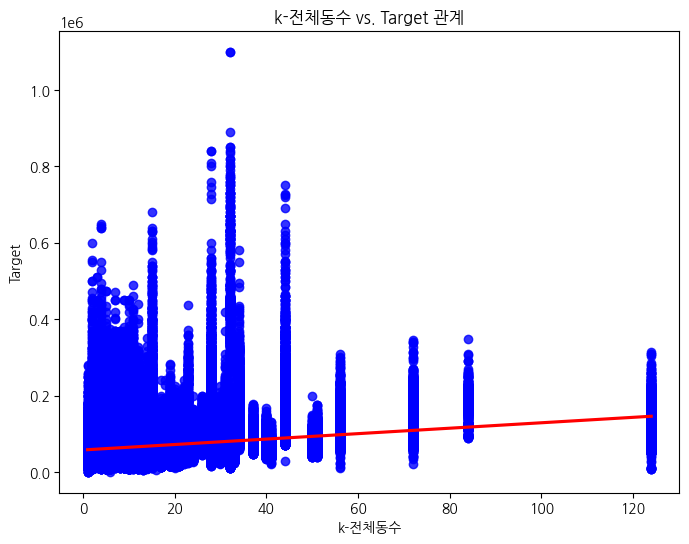

In [180]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-전체동수', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-전체동수 vs. Target 관계')
plt.xlabel('k-전체동수')
plt.ylabel('Target')
plt.show()

### 4.1.8 k-전체세대수

In [181]:
train_data['k-전체세대수'].isnull().sum()

869563

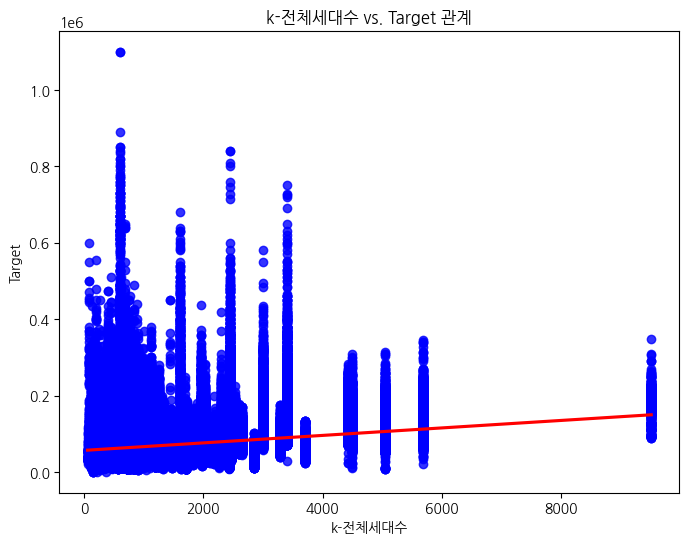

In [182]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-전체세대수', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-전체세대수 vs. Target 관계')
plt.xlabel('k-전체세대수')
plt.ylabel('Target')
plt.show()

### 4.1.9 k-연면적

In [195]:
train_data['k-연면적'].isnull().sum()

869563

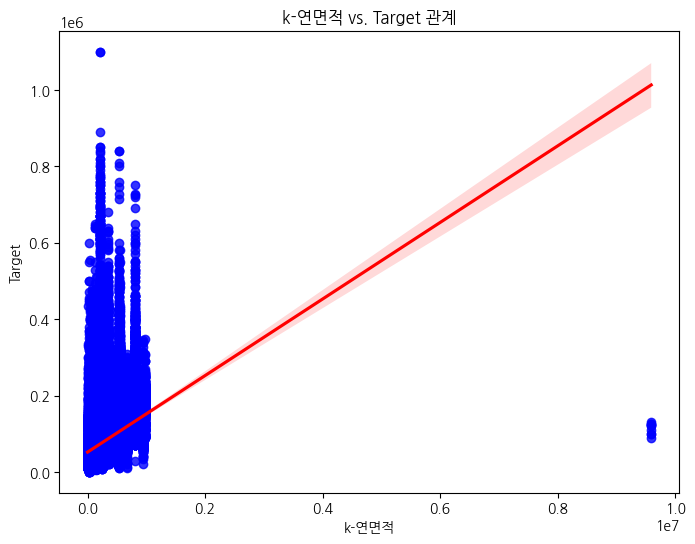

In [183]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-연면적', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-연면적 vs. Target 관계')
plt.xlabel('k-연면적')
plt.ylabel('Target')
plt.show()

### 4.1.10 k-주거전용면적

In [196]:
train_data['k-주거전용면적'].isnull().sum()

869608

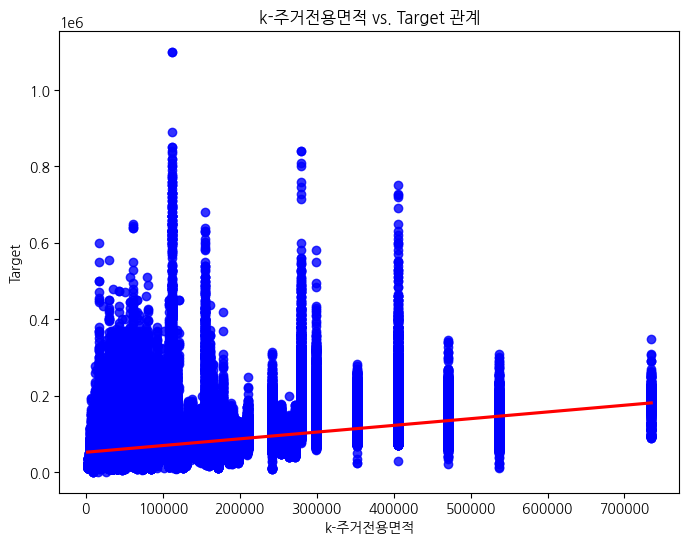

In [184]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-주거전용면적', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-주거전용면적 vs. Target 관계')
plt.xlabel('k-주거전용면적')
plt.ylabel('Target')
plt.show()

### 4.1.11 k-관리비부과면적

In [197]:
train_data['k-관리비부과면적'].isnull().sum()

869563

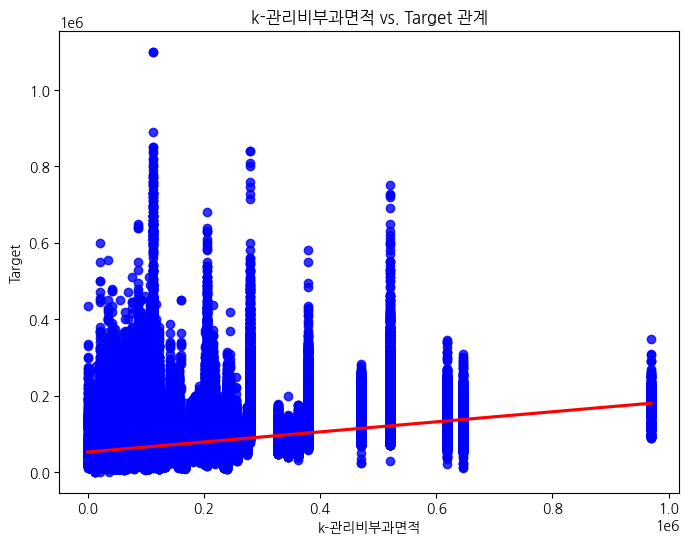

In [185]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-관리비부과면적', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-관리비부과면적 vs. Target 관계')
plt.xlabel('k-관리비부과면적')
plt.ylabel('Target')
plt.show()

### 4.1.12 k-전용면적별세대현황(60㎡이하)

In [198]:
train_data['k-전용면적별세대현황(60㎡이하)'].isnull().sum()

869608

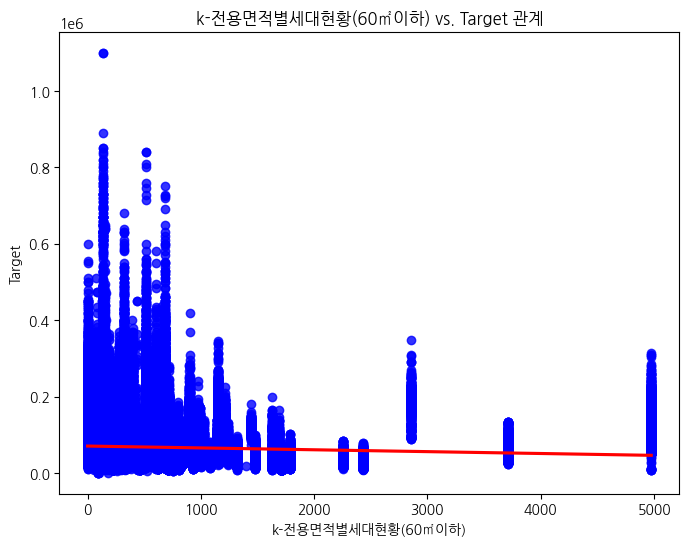

In [187]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-전용면적별세대현황(60㎡이하)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-전용면적별세대현황(60㎡이하) vs. Target 관계')
plt.xlabel('k-전용면적별세대현황(60㎡이하)')
plt.ylabel('Target')
plt.show()

### 4.1.13 k-전용면적별세대현황(60㎡~85㎡이하)

In [199]:
train_data['k-전용면적별세대현황(60㎡~85㎡이하)'].isnull().sum()

869608

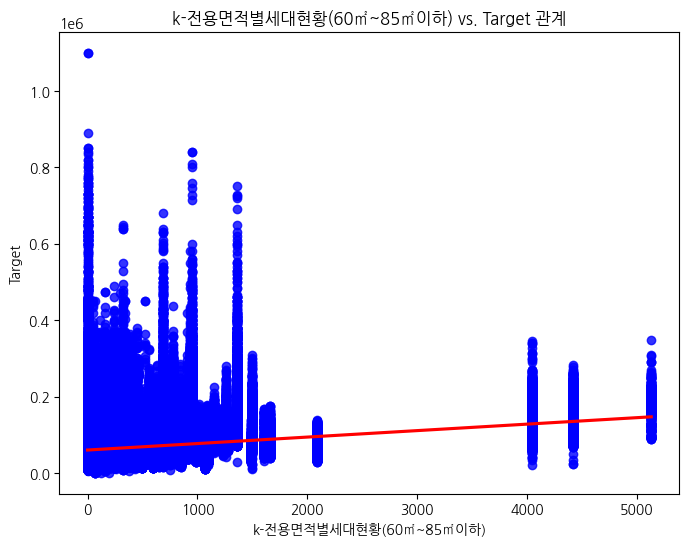

In [188]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-전용면적별세대현황(60㎡~85㎡이하)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-전용면적별세대현황(60㎡~85㎡이하) vs. Target 관계')
plt.xlabel('k-전용면적별세대현황(60㎡~85㎡이하)')
plt.ylabel('Target')
plt.show()

### 4.1.14 k-85㎡~135㎡이하

In [200]:
train_data['k-85㎡~135㎡이하'].isnull().sum()

869608

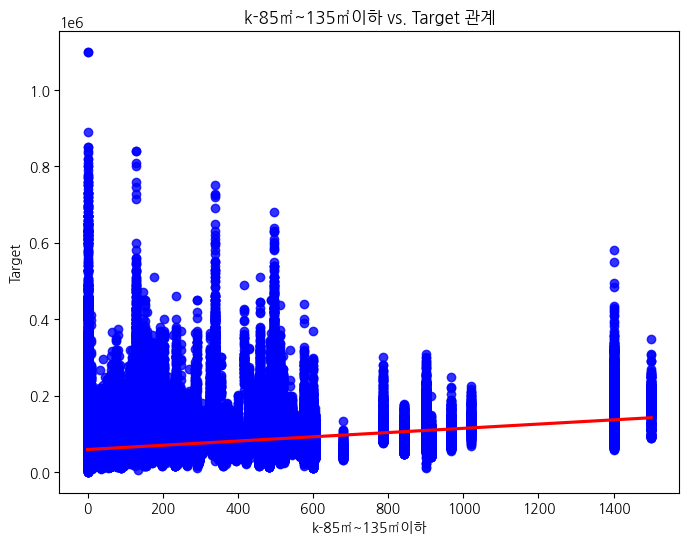

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-85㎡~135㎡이하', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-85㎡~135㎡이하 vs. Target 관계')
plt.xlabel('k-85㎡~135㎡이하')
plt.ylabel('Target')
plt.show()

### 4.1.15 k-135㎡초과

In [201]:
train_data['k-135㎡초과'].isnull().sum()

1118495

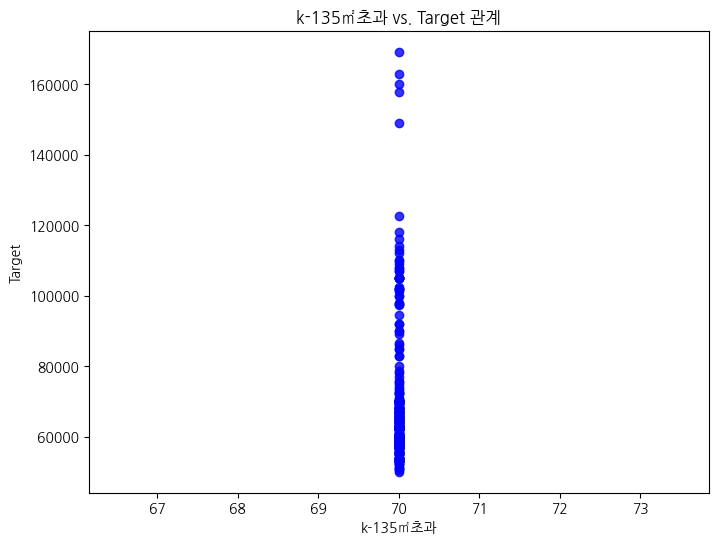

In [190]:
plt.figure(figsize=(8, 6))
sns.regplot(x='k-135㎡초과', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('k-135㎡초과 vs. Target 관계')
plt.xlabel('k-135㎡초과')
plt.ylabel('Target')
plt.show()

- Analytics

    - k- 로 시작하는 특성들의 경우 결측치가 매우 많음

    - 또한, 각각의 특성들이 약한 상관관계를 많이 보이고, k-연면적 특성만 강한 상관관계를 보임

    - 각각의 특성들이 유사(특성들 간 강한 상관관계)함을 보이는 패턴이 많기에 다음의 특성만 Keep

    - k-연면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하), k-전체세대수

        - 135 초과는 너무 한 값에 집중되어 있기에 제거

        - 주차대수와 전체세대수를 비교하여 유의미한 파생변수 생성 가능 

### 4.1.16 건축면적

In [202]:
train_data['건축면적'].isnull().sum()

869714

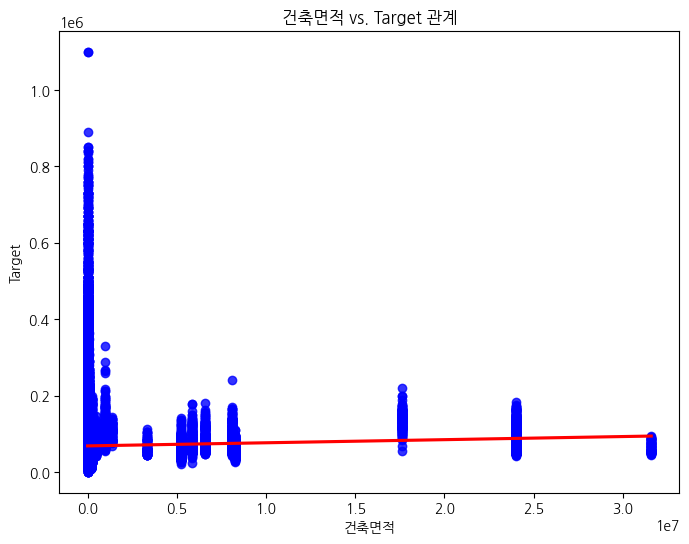

In [191]:
plt.figure(figsize=(8, 6))
sns.regplot(x='건축면적', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('건축면적 vs. Target 관계')
plt.xlabel('건축면적')
plt.ylabel('Target')
plt.show()

- Analytics

    - 매우 약한 상관관계를 보임

    - k-연면적이 더 강한 상관관계를 보이기에 Drop

### 4.1.17 주차대수

In [203]:
train_data['주차대수'].isnull().sum()

869714

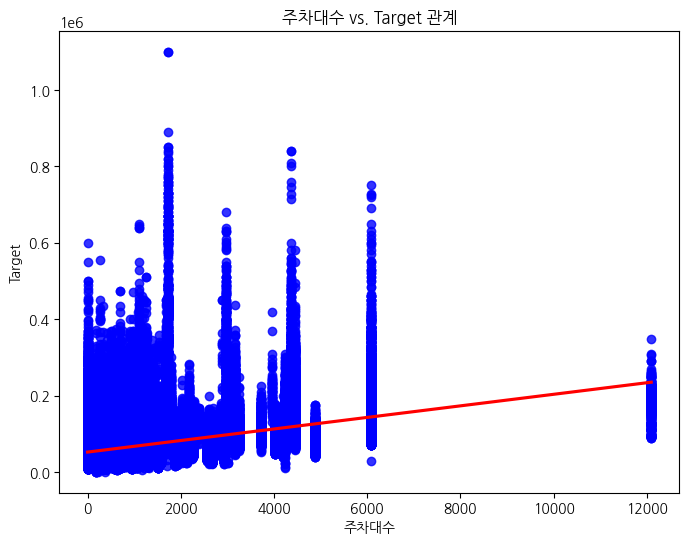

In [192]:
plt.figure(figsize=(8, 6))
sns.regplot(x='주차대수', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('주차대수 vs. Target 관계')
plt.xlabel('주차대수')
plt.ylabel('Target')
plt.show()

- Analytics

    - 약한 상관관계를 보임

    - k-전체세대수 특성과 조합하여 유의미한 파생변수 생성 → Keep

### 4.1.18 계약(연)

In [204]:
train_data['계약(연)'].isnull().sum()

0

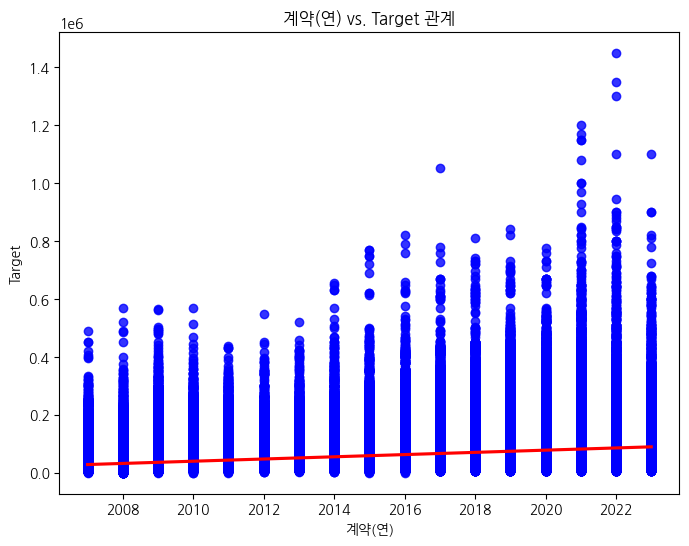

In [193]:
plt.figure(figsize=(8, 6))
sns.regplot(x='계약(연)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('계약(연) vs. Target 관계')
plt.xlabel('계약(연)')
plt.ylabel('Target')
plt.show()

- Analytics

    - 년도에 따른 부동산 가격 변동 추세이기에 시간에 따른 target의 변화를 파악 → Keep

### 4.1.19 계약(월)

In [205]:
train_data['계약(월)'].isnull().sum()

0

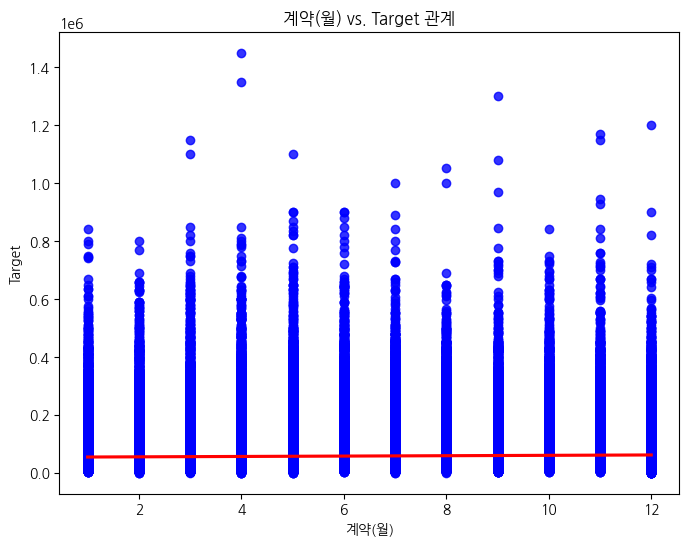

In [194]:
plt.figure(figsize=(8, 6))
sns.regplot(x='계약(월)', y='target', data=train_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('계약(월) vs. Target 관계')
plt.xlabel('계약(월)')
plt.ylabel('Target')
plt.show()

- Analytics

    - 모든 월에서 거의 균등한 target을 보임

    - 계절적 패턴이 보이지 않음 → Drop

### 4.1.20 좌표값

In [215]:
train_data['좌표X'].isnull().sum()

869670

In [216]:
train_data['좌표Y'].isnull().sum()

869670

좌표값의 경우 군집 클러스터링을 통해 군집화할 수 있는 방안이 존재하므로 Keep

## 4.2 범주형 데이터

### 4.2.1 번지

In [208]:
train_data['번지'].isnull().sum()

225

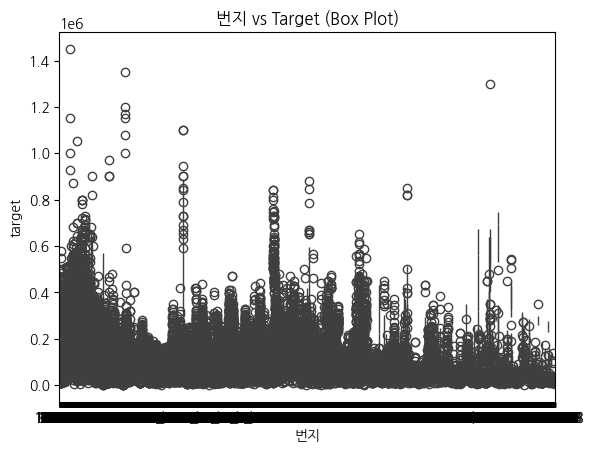

In [207]:
sns.boxplot(x='번지', y='target', data=train_data)
plt.title('번지 vs Target (Box Plot)')
plt.show()

- Analytics

    - 생각보다 고윳값이 너무 많고 좌표값을 이용한 군집 클러스터링으로 변환하는 것이 좋아보임 → Drop

### 4.2.2 아파트명

In [267]:
train_data['아파트명'].isnull().sum()

2126

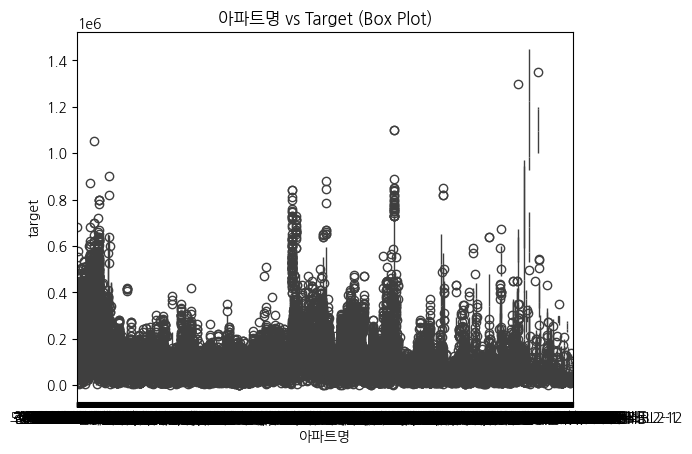

In [268]:
sns.boxplot(x='아파트명', y='target', data=train_data)
plt.title('아파트명 vs Target (Box Plot)')
plt.show()

### 4.2.3 도로명

In [211]:
train_data['도로명'].isnull().sum()

0

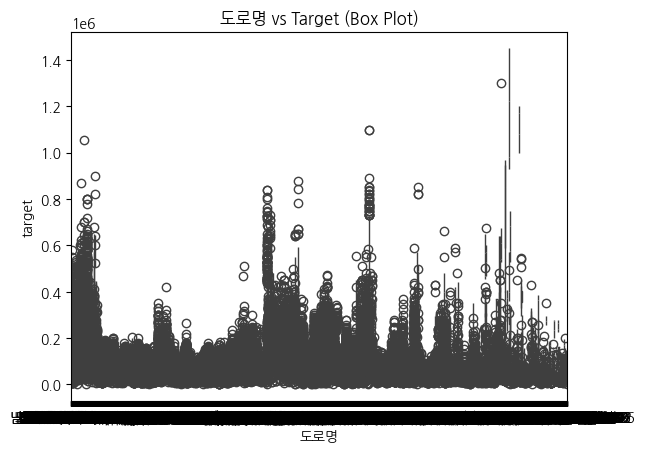

In [212]:
sns.boxplot(x='도로명', y='target', data=train_data)
plt.title('도로명 vs Target (Box Plot)')
plt.show()

- Analytics

    - 아파트명, 도로명 두 특성 간 매우 강한 상관관계가 있는것으로 보임

    - 좌표값의 전처리를 위해 두 특성을 결합한 다음, 전처리 후 도로명 삭제

    - 아파트명 하나만 Keep

### 4.2.4 등기신청일자

In [213]:
train_data['등기신청일자'].isnull().sum()

0

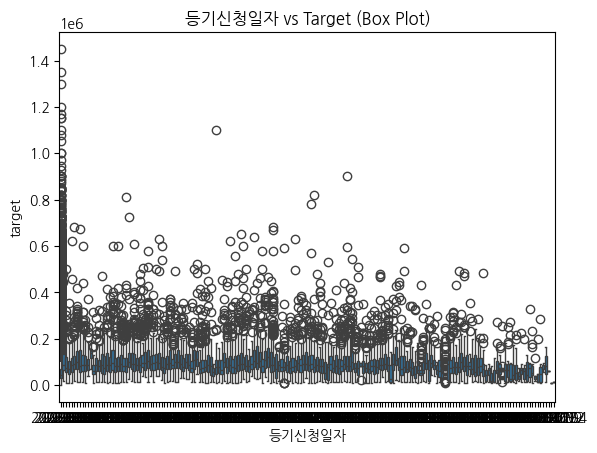

In [217]:
sns.boxplot(x='등기신청일자', y='target', data=train_data)
plt.title('등기신청일자 vs Target (Box Plot)')
plt.show()

- Analytics

    - 등기신청일자는 등기신청여부 특성으로 변환하여 판단 필요 → Change

### 4.2.5 거래유형

In [226]:
train_data['거래유형'].isnull().sum()

0

In [228]:
train_data['거래유형'].value_counts()

거래유형
-       1086451
중개거래      29271
직거래        3100
Name: count, dtype: int64

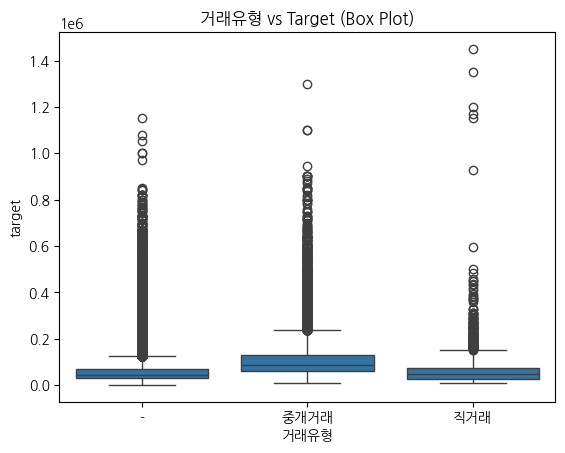

In [ ]:
sns.boxplot(x='거래유형', y='target', data=train_data)
plt.title('거래유형 vs Target (Box Plot)')
plt.show()

- Analytics

    - 결측치가 100만개가 넘기에 너무 많음 → Drop

### 4.2.6 중개사소재지

In [220]:
train_data['중개사소재지'].isnull().sum()

0

In [235]:
train_data['중개사소재지'].value_counts()

중개사소재지
-                    1089581
서울 강남구                  2000
서울 송파구                  1995
서울 노원구                  1966
서울 강동구                  1597
                      ...   
경기 성남중원구, 서울 노원구           1
서울 강북구, 서울 양천구             1
서울 관악구, 서울 노원구             1
경기 남양주시, 경기 성남수정구          1
서울 동대문구, 인천 연수구            1
Name: count, Length: 643, dtype: int64

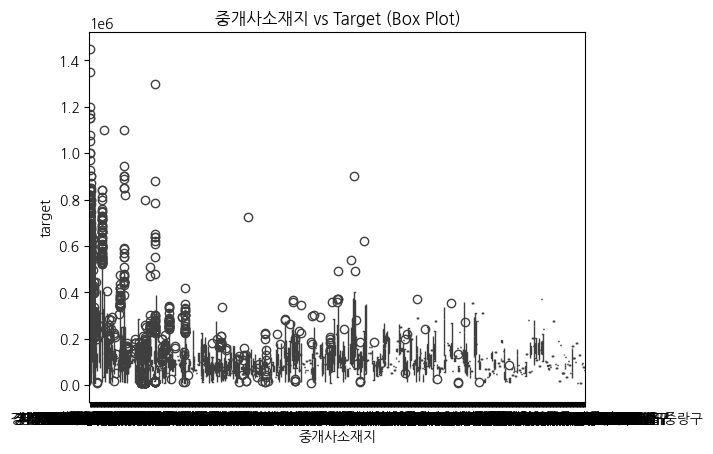

In [221]:
sns.boxplot(x='중개사소재지', y='target', data=train_data)
plt.title('중개사소재지 vs Target (Box Plot)')
plt.show()

- Analytics

    - 거래유형이 제거됨에 따라 중개사소재지도 제거

    - 마찬가지로 결측치가 너무 많음 → Drop

### 4.2.7 k-단지분류(아파트,주상복합등등)

In [222]:
train_data['k-단지분류(아파트,주상복합등등)'].isnull().sum()

870691

In [237]:
train_data['k-단지분류(아파트,주상복합등등)'].value_counts()

k-단지분류(아파트,주상복합등등)
아파트               235994
주상복합               11360
도시형 생활주택(주상복합)       500
도시형 생활주택(아파트)        152
연립주택                 125
Name: count, dtype: int64

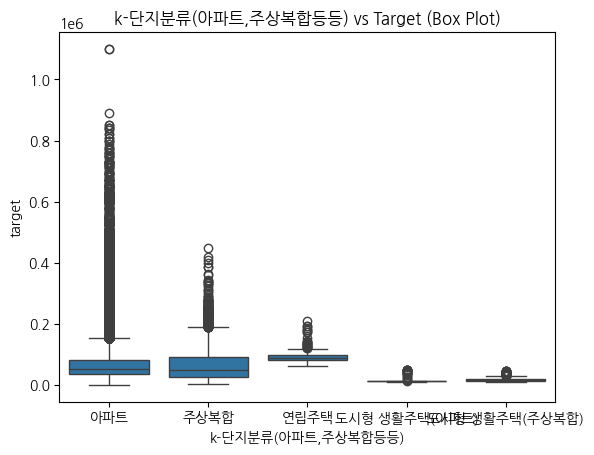

In [223]:
sns.boxplot(x='k-단지분류(아파트,주상복합등등)', y='target', data=train_data)
plt.title('k-단지분류(아파트,주상복합등등) vs Target (Box Plot)')
plt.show()

### 4.2.8 k-세대타입(분양형태)

In [224]:
train_data['k-세대타입(분양형태)'].isnull().sum()

869563

In [238]:
train_data['k-세대타입(분양형태)'].value_counts()

k-세대타입(분양형태)
분양    206371
기타     40686
임대      2202
Name: count, dtype: int64

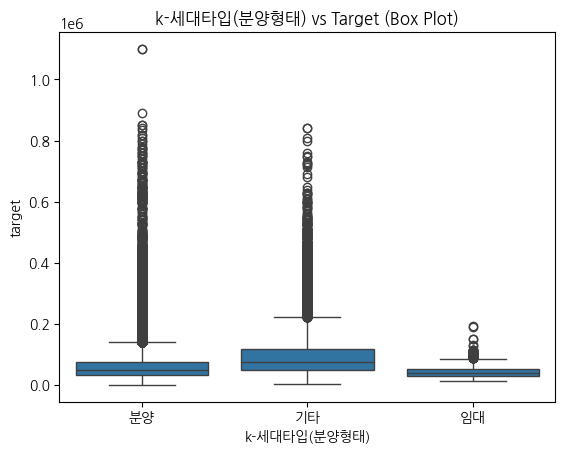

In [225]:
sns.boxplot(x='k-세대타입(분양형태)', y='target', data=train_data)
plt.title('k-세대타입(분양형태) vs Target (Box Plot)')
plt.show()

### 4.2.9 k-관리방식

In [239]:
train_data['k-관리방식'].isnull().sum()

869563

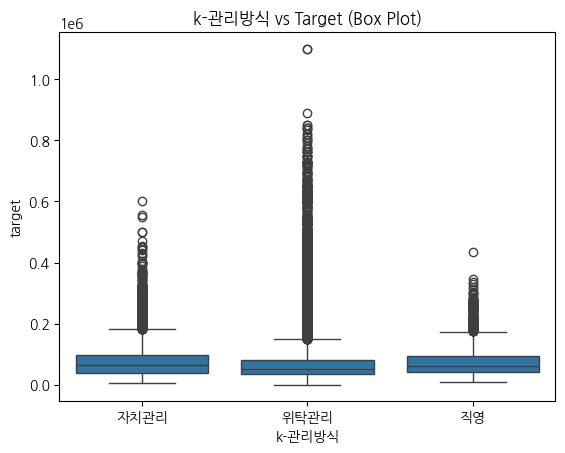

In [240]:
sns.boxplot(x='k-관리방식', y='target', data=train_data)
plt.title('k-관리방식 vs Target (Box Plot)')
plt.show()

### 4.2.10 k-복도유형

In [241]:
train_data['k-복도유형'].isnull().sum()

869890

In [252]:
train_data['k-복도유형'].value_counts()

k-복도유형
계단식    123651
혼합식     84491
복도식     38383
타워형      1340
기타       1067
Name: count, dtype: int64

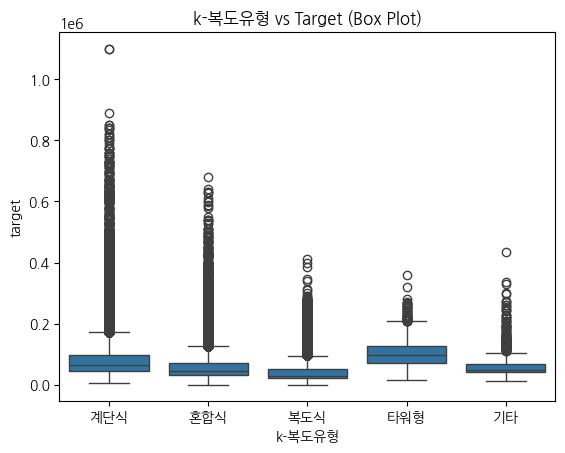

In [242]:
sns.boxplot(x='k-복도유형', y='target', data=train_data)
plt.title('k-복도유형 vs Target (Box Plot)')
plt.show()

### 4.2.11 k-난방방식

In [243]:
train_data['k-복도유형'].isnull().sum()

869890

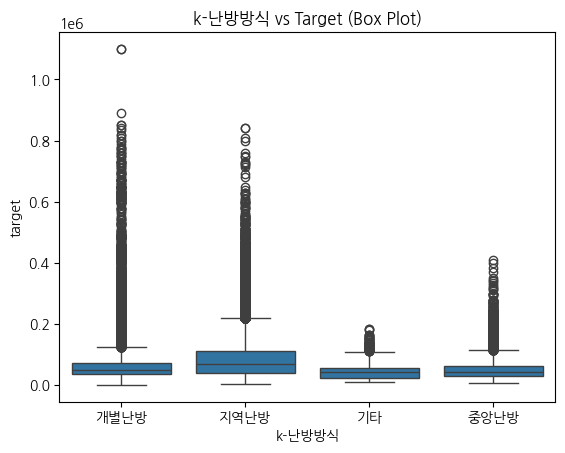

In [244]:
sns.boxplot(x='k-난방방식', y='target', data=train_data)
plt.title('k-난방방식 vs Target (Box Plot)')
plt.show()

### 4.2.12 k-건설사(시공사)

In [245]:
train_data['k-건설사(시공사)'].isnull().sum()

871058

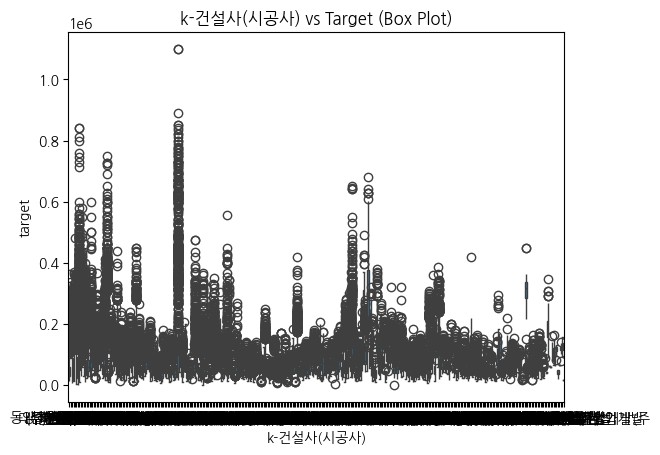

In [247]:
sns.boxplot(x='k-건설사(시공사)', y='target', data=train_data)
plt.title('k-건설사(시공사) vs Target (Box Plot)')
plt.show()

- Analytics

    - 건설사에 따라 target의 고점이 높은것이 있지만, 전체적으로 

### 4.2.13 k-시행사

In [248]:
train_data['k-시행사'].isnull().sum()

871254

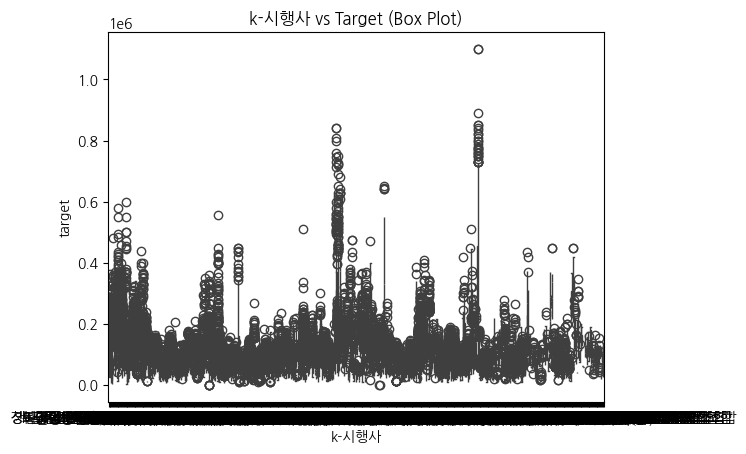

In [249]:
sns.boxplot(x='k-시행사', y='target', data=train_data)
plt.title('k-시행사 vs Target (Box Plot)')
plt.show()

### 4.2.14 k-사용검사일-사용승인일

In [251]:
train_data['k-사용검사일-사용승인일'].isnull().sum()

869696

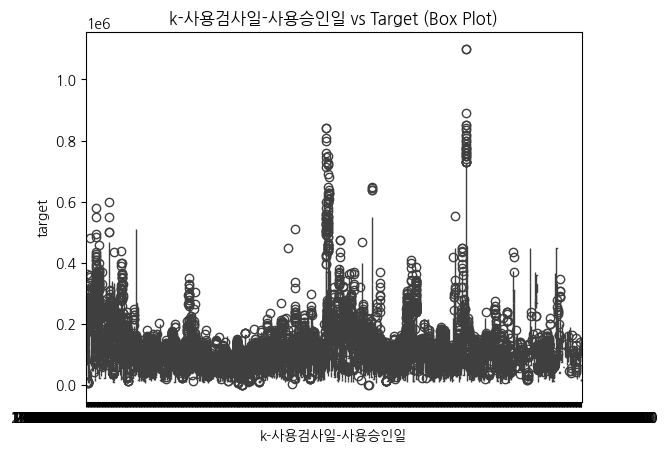

In [250]:
sns.boxplot(x='k-사용검사일-사용승인일', y='target', data=train_data)
plt.title('k-사용검사일-사용승인일 vs Target (Box Plot)')
plt.show()

- Analytics

    - 수치형 데이터 분석할때와 마찬가지로 k- 가 붙은 특성들은 전체적으로 결측치 비율이 높음

    - 따라서 아래의 특성들만을 Keep

    - k-복도유형, k-단지분류(아파트,주상복합등등)

    - 두 특성모두 불균형하기에 샘플링 필요

### 4.2.15 경비비관리형태

In [253]:
train_data['경비비관리형태'].isnull().sum()

870988

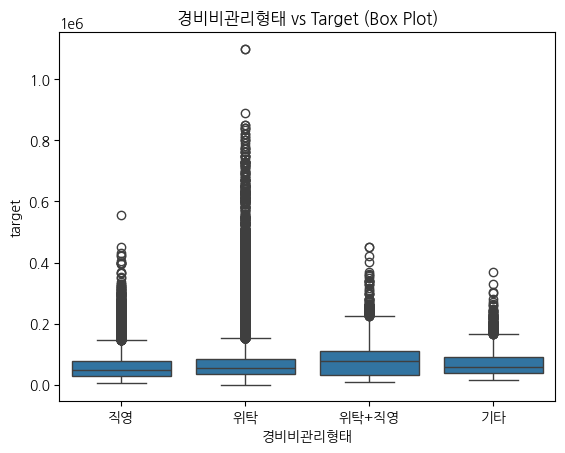

In [254]:
sns.boxplot(x='경비비관리형태', y='target', data=train_data)
plt.title('경비비관리형태 vs Target (Box Plot)')
plt.show()

- Analytics

    - 특정 방식에서 target이 높지만 나머지가 거의 일정한 target 상한, 중간선을 가짐

    - 결측치가 높기에 Drop

### 4.2.16 세대전기계약방법

In [255]:
train_data['세대전기계약방법'].isnull().sum()

878747

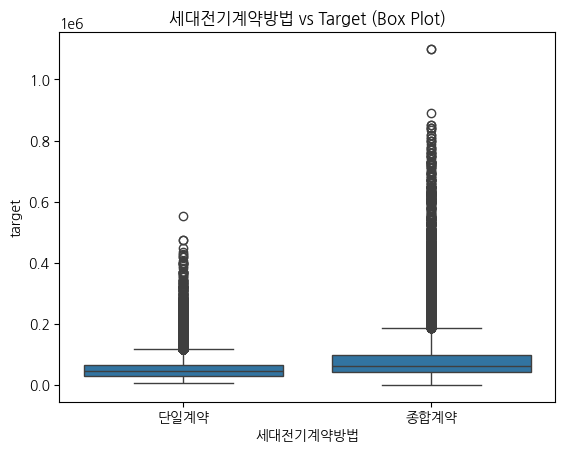

In [256]:
sns.boxplot(x='세대전기계약방법', y='target', data=train_data)
plt.title('세대전기계약방법 vs Target (Box Plot)')
plt.show()

### 4.2.17 청소비관리형태

In [257]:
train_data['청소비관리형태'].isnull().sum()

871178

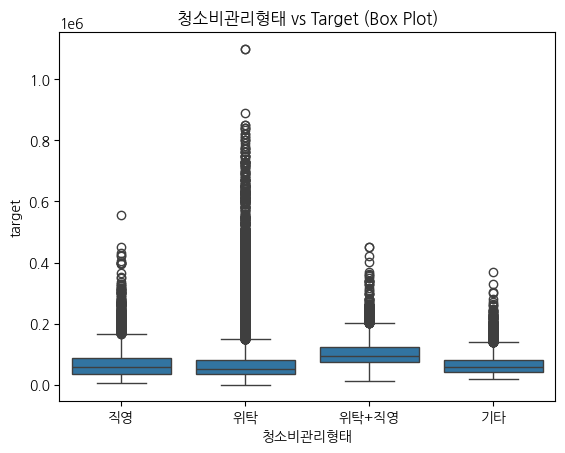

In [258]:
sns.boxplot(x='청소비관리형태', y='target', data=train_data)
plt.title('청소비관리형태 vs Target (Box Plot)')
plt.show()

### 4.2.18 기타/의무/임대/임의=1/2/3/4

In [259]:
train_data['기타/의무/임대/임의=1/2/3/4'].isnull().sum()

869563

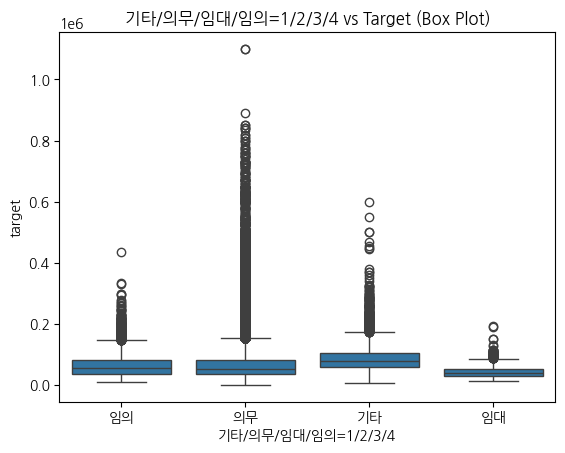

In [260]:
sns.boxplot(x='기타/의무/임대/임의=1/2/3/4', y='target', data=train_data)
plt.title('기타/의무/임대/임의=1/2/3/4 vs Target (Box Plot)')
plt.show()

### 4.2.19 단지승인일

In [262]:
train_data['단지승인일'].isnull().sum()

870286

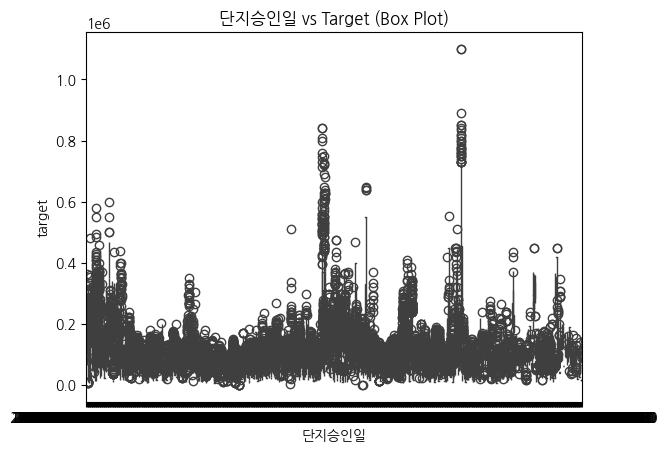

In [261]:
sns.boxplot(x='단지승인일', y='target', data=train_data)
plt.title('단지승인일 vs Target (Box Plot)')
plt.show()

### 4.2.20 사용허가여부

In [263]:
train_data['사용허가여부'].isnull().sum()

869563

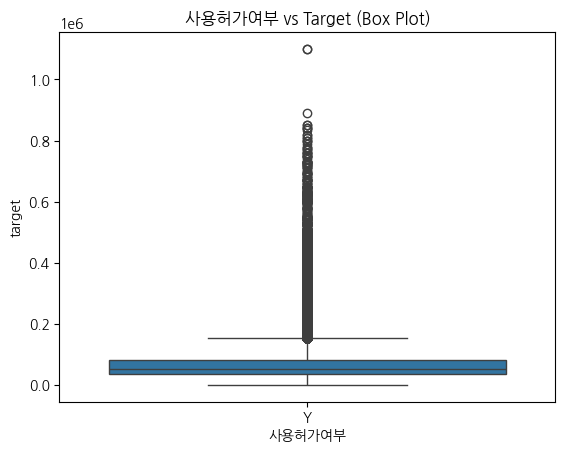

In [264]:
sns.boxplot(x='사용허가여부', y='target', data=train_data)
plt.title('사용허가여부 vs Target (Box Plot)')
plt.show()

### 4.2.21 단지신청일

In [265]:
train_data['단지신청일'].isnull().sum()

869625

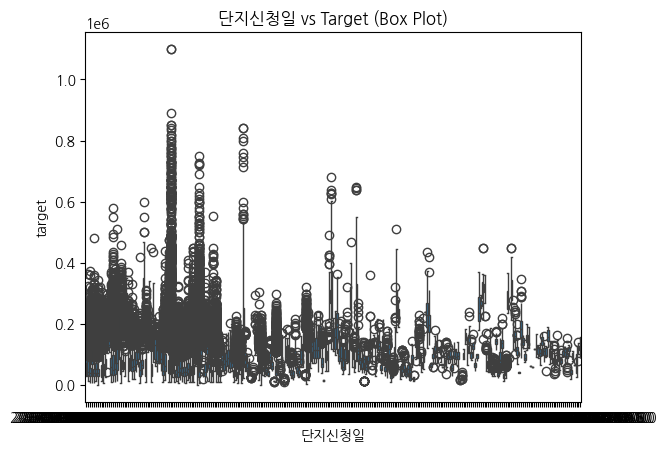

In [266]:
sns.boxplot(x='단지신청일', y='target', data=train_data)
plt.title('단지신청일 vs Target (Box Plot)')
plt.show()

## 4.3 EDA 종합

- 전체적으로 결측치가 너무 많고, 그 내부에서도 데이터 불균형이 심함

- 너무 강한 상관관계를 갖는 특성들은 제거 필요

- 유지할 특성들은 다음과 같다.

- 전용면적(㎡), 건축년도, 해제사유발생일, k-연면적, k-전용면적별세대현황(60㎡~85㎡이하),k-전용면적별세대현황(85㎡~135㎡이하), k-전체세대수, 주차대수, 계약(연), 좌표X, 좌표Y, 아파트명, 도로명, 등기신청일자, k-복도유형, k-단지분류(아파트,주상복합등등)